In [ ]:
import os
import sys
from langchain_community.vectorstores import Chroma
from IPython.display import display, Markdown

current_dir = os.getcwd()
kit_dir = os.path.abspath(os.path.join(current_dir, ".."))
repo_dir = os.path.abspath(os.path.join(kit_dir, ".."))

sys.path.append(kit_dir)
sys.path.append(repo_dir)

from enterprise_knowledge_retriever.src.document_retrieval import DocumentRetrieval
from enterprise_knowledge_retriever.src.langgraph_rag import RAG
 
CONFIG_PATH = os.path.join(kit_dir,'config.yaml')

In [14]:
documentRetrieval =  DocumentRetrieval()
*_, embedding_model_info ,retrieval_info, _ = documentRetrieval.get_config_info()
embeddings = documentRetrieval.load_embedding_model()

In [15]:
vectorstore = Chroma(
        persist_directory=os.path.join(kit_dir , "data/my_vector-db"),
        embedding_function=embeddings
        )

2024-05-22 09:25:44,372 [INFO] - Collection langchain is not created.


In [16]:
rag = RAG(
    config_path=CONFIG_PATH,
    embeddings = embeddings,
    vectorstore=vectorstore
    )

# Initialize chains
rag.init_llm()
rag.init_qa_chain()
rag.init_final_generation()

# Build nodes
workflow = rag.create_rag_nodes()
print(workflow)

# Build graph
rag.build_rag_graph(workflow)

{'api': 'sambaverse', 'embedding_model': 'sambastudio', 'loaders': {'pdf': 'unstructured', 'txt': 'text_loader'}, 'llm': {'temperature': 0.0, 'max_tokens_to_generate': 1200, 'sambaverse_model_name': 'Meta/llama-2-70b-chat-hf', 'sambaverse_select_expert': 'llama-2-70b-chat-hf'}, 'retrieval_rag': {'chunk_size': 1200, 'chunk_overlap': 240, 'db_type': 'chroma', 'k_retrieved_documents': 3, 'score_threshold': 0.6}, 'retrieval_complex_rag': {'top_k': 12, 'final_k': 1, 'rerank': True, 'example_selector_k': 3, 'entity_key': 'filename'}}


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
2024-05-22 09:25:50,893 [INFO] - Browser listening on: ws://127.0.0.1:59517/devtools/browser/be41c2db-f7ae-4354-8d3b-a34eaa490cfc
2024-05-22 09:25:53,051 [INFO] - terminate chrome process...



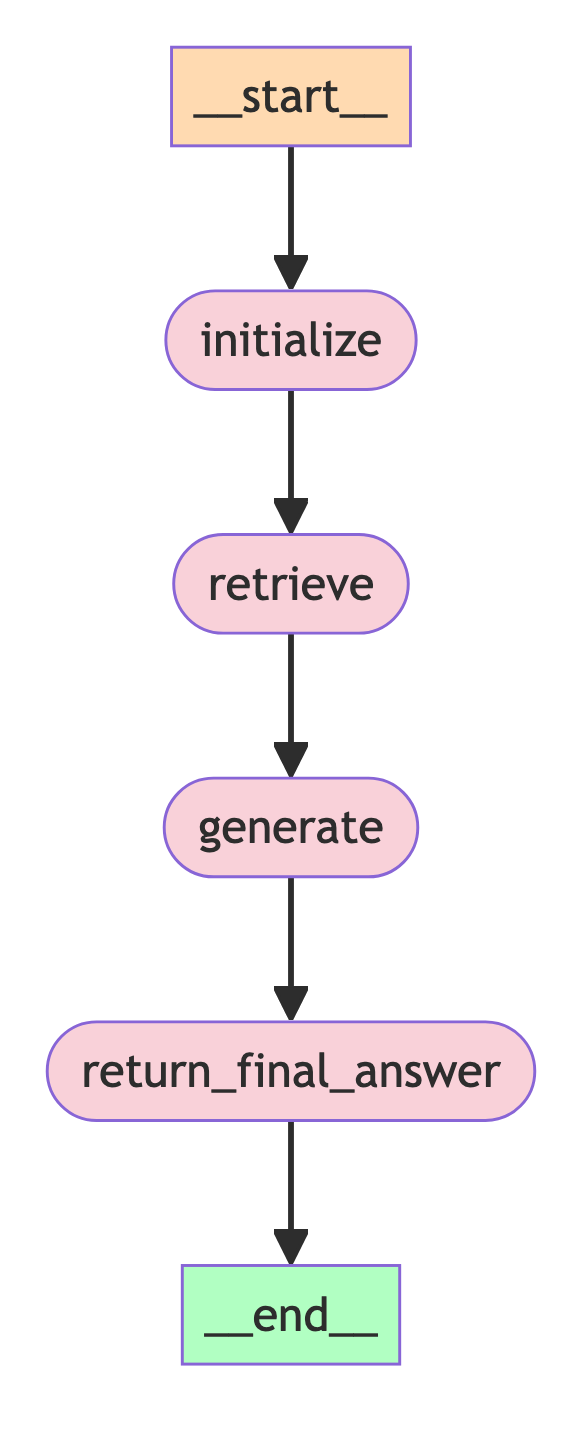

In [17]:
rag.display_graph(rag.app)

In [ ]:
response = rag.call_rag(question="user question")

display(Markdown(response))